<a href="https://colab.research.google.com/github/aseelalzaben03/Teeth-Classification-using-CNN/blob/main/NEWW_TEETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
dataset_path = '/content/drive/My Drive/Teeth_Dataset'

In [20]:
import os
dataset_path = '/content/drive/My Drive/Teeth_Dataset'
print("Files and folders in the dataset path:")
print(os.listdir(dataset_path))


Files and folders in the dataset path:
['Training', 'Validation', 'Testing']


In [21]:
train_path = '/content/drive/My Drive/Teeth_Dataset/Training'
val_path = '/content/drive/My Drive/Teeth_Dataset/Validation'
test_path = '/content/drive/My Drive/Teeth_Dataset/Testing'

print("Training data:", os.listdir(train_path))
print("Validation data:", os.listdir(val_path))
print("Testing data:", os.listdir(test_path))


Training data: ['CaS', 'Gum', 'OC', 'CoS', 'MC', 'OT', 'OLP']
Validation data: ['OC', 'OLP', 'CoS', 'OT', 'CaS', 'MC', 'Gum']
Testing data: ['output_image.jpg', 'outputs', 'OLP', 'output', 'OC', 'CoS', 'out', 'OT', 'Gum', 'CaS', 'MC']


## Preprocessing


In [22]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
# Define paths
train_path = '/content/drive/My Drive/Teeth_Dataset/Training'
val_path = '/content/drive/My Drive/Teeth_Dataset/Validation'
test_path = '/content/drive/My Drive/Teeth_Dataset/Testing'


In [24]:
# Parameters
IMG_HEIGHT = 256 # Resize height
IMG_WIDTH = 256   # Resize width
BATCH_SIZE = 32   # Number of images in each batch


In [25]:
# For training data: Include augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Light Augmentation: Minimal changes to retain clarity
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Only rescale, no mean normalization
    rotation_range=3,         # Tiny rotation (3 degrees max)
    width_shift_range=0.02,   # Small horizontal shift (2%)
    height_shift_range=0.02,  # Small vertical shift (2%)
    zoom_range=0.05,          # Slight zoom (5%)
    horizontal_flip=True,     # Allow horizontal flip
    fill_mode='nearest'       # Fill missing pixels naturally
)

# Validation & Test: No augmentation, only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [53]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Validation data generator
val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test data generator
test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Ensure class_mode is 'categorical'
    shuffle=False  # Add shuffle=False to prevent shuffling during evaluation
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1508 images belonging to 10 classes.


In [27]:
# Check class indices
print("Class indices:", train_generator.class_indices)

# Check a batch of images and labels
sample_images, sample_labels = next(train_generator)
print("Sample image shape:", sample_images[0].shape)  # (256, 256, 3)
print("Sample label shape:", sample_labels[0].shape)  # Number of classes(7)


Class indices: {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
Sample image shape: (256, 256, 3)
Sample label shape: (7,)


## Class Distribution in Training Dataset

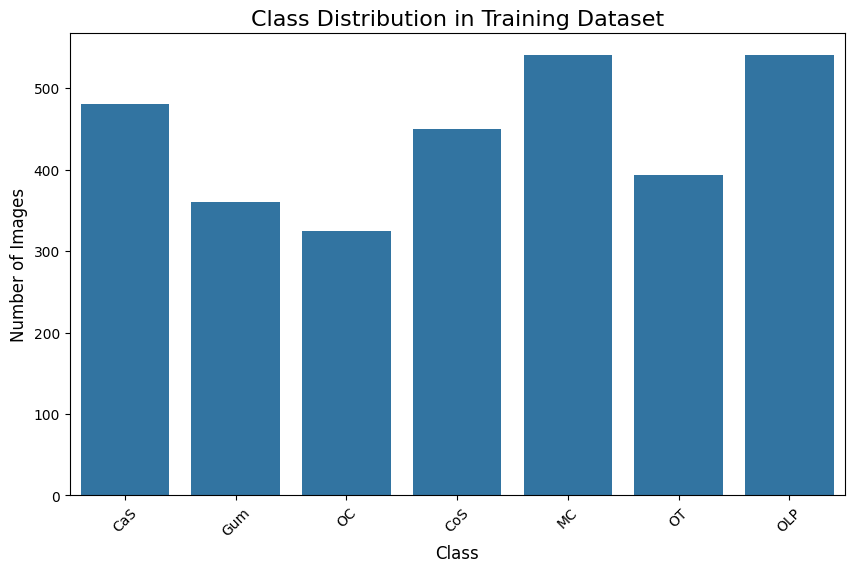

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count class distribution in the training set
def count_classes(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get class counts
train_class_counts = count_classes(train_path)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.title("Class Distribution in Training Dataset", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Display Original Images

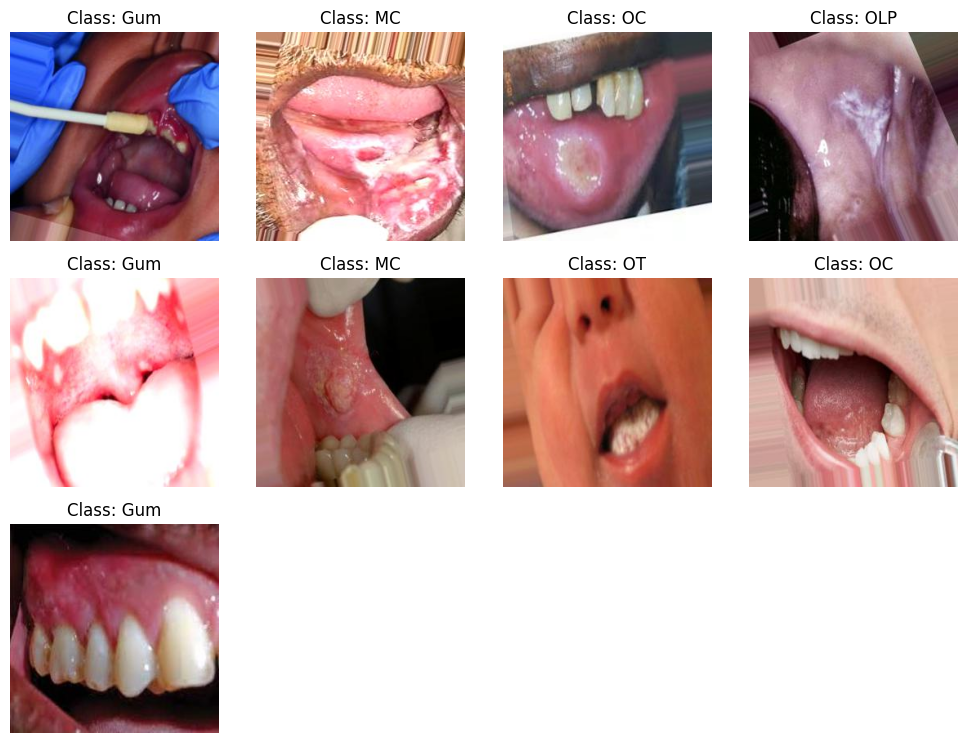

In [29]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def display_images(directory, num_images=9):
    classes = os.listdir(directory)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        class_name = random.choice(classes)
        class_dir = os.path.join(directory, class_name)
        image_name = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_name)

        # Load and display the image
        img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some original training images
display_images(train_path)


## Display Augmented Images

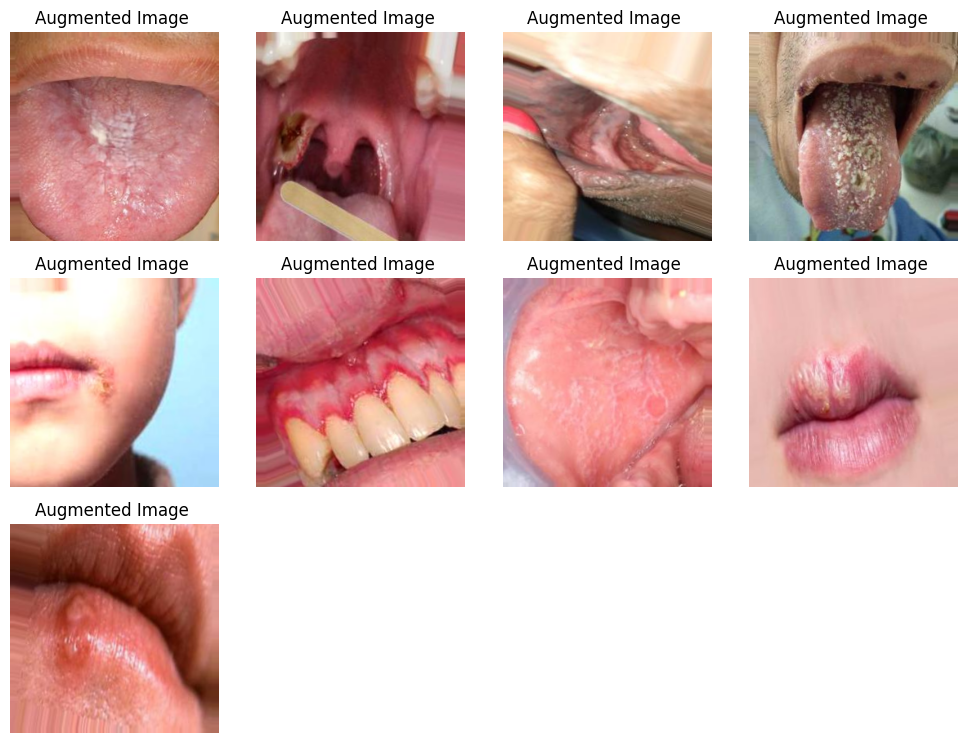

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of augmented images
augmented_images, _ = next(train_generator)

# Display the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Show 9 images in a 4x4 grid
    plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[i])  # Display the image
    plt.axis('off')
    plt.title("Augmented Image ")
plt.tight_layout()
plt.show()


## Modeling


In [44]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler

# Define learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr  # Keep the initial learning rate for the first 5 epochs
    else:
        return lr * 0.1  # Reduce learning rate by a factor of 10 after 5 epochs

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),

    # First Conv2D layer + Batch Normalization
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Conv2D layer + Batch Normalization
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Conv2D layer + Batch Normalization
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Additional Conv2D layer for better feature extraction
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert features into a 1D vector
    layers.Flatten(),

    # Fully connected Dense layers with increased neurons
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer (7 categories)
    layers.Dense(7, activation='softmax')
])


In [48]:
# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 34,404,560 (131.24 MB)

 Trainable params: 17,201,415 (65.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

 Optimizer params: 17,201,417 (65.62 MB)

In [45]:
# Compile the model with SGD optimizer and learning rate scheduler
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
# Apply learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)


In [50]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,  # You can increase epochs for more training
    validation_data=val_generator,
    callbacks=[lr_scheduler]  # Include learning rate scheduler callback
)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 62s 641ms/step - accuracy: 0.5592 - loss: 1.2263 - val_accuracy: 0.6119 - val_loss: 1.0633 - learning_rate: 1.0000e-07
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 61s 629ms/step - accuracy: 0.5294 - loss: 1.2505 - val_accuracy: 0.6158 - val_loss: 1.0642 - learning_rate: 1.0000e-07
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 647ms/step - accuracy: 0.5622 - loss: 1.1871 - val_accuracy: 0.6138 - val_loss: 1.0640 - learning_rate: 1.0000e-07
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 91s 744ms/step - accuracy: 0.5534 - loss: 1.2052 - val_accuracy: 0.6119 - val_loss: 1.0647 - learning_rate: 1.0000e-07
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 66s 678ms/step - accuracy: 0.5401 - loss: 1.2314 - val_accuracy: 0.6138 - val_loss: 1.0644 - learning_rate: 1.0000e-07
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 80s 826ms/step - accuracy: 0.5384 - loss: 1.2025 - val_accuracy: 0.6138 - val_loss: 1.0632 - learning_rate: 1.0000e-08
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 61s 625ms/step - acc

In [51]:
#  Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc:.4f}")



33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.6185 - loss: 1.0776
Validation accuracy: 0.6138


48/48 ━━━━━━━━━━━━━━━━━━━━ 587s 12s/step


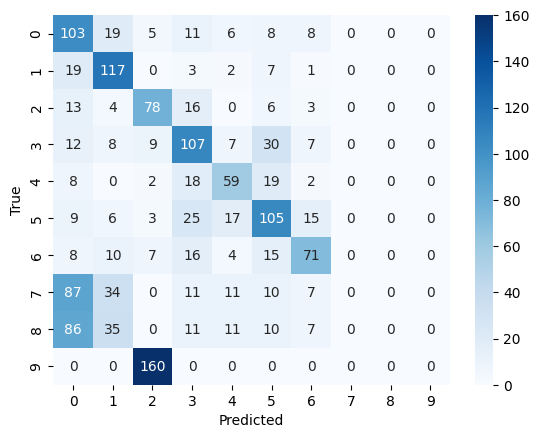

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true classes (labels) from the test generator
true_classes = test_generator.classes

# Predict classes for the test data
predicted_probs = model.predict(test_generator)  # Get predicted probabilities
predicted_classes = np.argmax(predicted_probs, axis=1)  # Get class with highest probability

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [58]:
#  Save the model after training
model.save('teeth_classification_model.h5')

In [59]:

# to reuse this model

#from tensorflow.keras.models import load_model

# Load the saved model
#model = load_model('teeth_classification_model.h5')

# Now you can use the model to evaluate, predict, or continue training
